In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00
time: 438 µs (started: 2023-05-08 09:17:48 +00:00)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
np.set_printoptions(threshold=np.inf)

time: 351 ms (started: 2023-05-08 09:17:48 +00:00)


In [4]:

sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TRAINING_DATA.csv')

testData =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/synthetic data/SyntheticDataMean.csv')

time: 6.02 s (started: 2023-05-08 09:20:35 +00:00)


In [5]:
testData

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force,Object_Held
0,0.013363,68.958850,1.129025,68.984378,0.344558,68.789578,-0.242083,69.721305,-0.028642,148.923797,...,173.005531,1.590232,332.448339,0.394585,332.421216,-0.359495,332.555349,0.279436,327.696694,CUBE_A
1,0.016175,68.746845,1.112061,68.774985,0.342472,68.787830,-0.235898,68.561153,-0.025593,148.367816,...,170.966222,1.591811,336.436178,0.393768,336.355007,-0.366089,336.450464,0.284693,334.177254,CUBE_A
2,0.013498,67.973695,1.125606,67.998233,0.332229,68.144837,-0.218236,68.362296,-0.026039,150.671012,...,172.925201,1.596374,337.236088,0.381034,336.930494,-0.365374,337.006606,0.276954,331.447836,CUBE_A
3,0.015856,69.155468,1.125125,69.183196,0.334425,69.456207,-0.237524,69.870680,-0.025468,148.885800,...,172.962314,1.595192,338.951477,0.390422,338.872197,-0.371891,339.008733,0.284546,336.761059,CUBE_A
4,0.016108,67.431520,1.125108,67.453015,0.341770,67.808223,-0.219481,68.569621,-0.025236,149.232485,...,173.653782,1.596656,335.668922,0.386014,335.532971,-0.366635,335.543558,0.284337,329.397149,CUBE_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,0.014515,29.421276,0.657132,29.398263,0.483156,29.369414,0.173462,29.440726,0.011119,17.687405,...,24.657056,1.543602,70.400803,0.149599,70.357441,0.027877,70.287542,0.030676,69.213731,CUBOID_B
38996,0.014686,29.395825,0.657333,29.373104,0.482801,29.351344,0.173746,29.369821,0.011153,17.896059,...,24.731245,1.543430,70.367094,0.150309,70.348075,0.028170,70.287945,0.030102,69.611412,CUBOID_B
38997,0.014443,29.400260,0.657573,29.377728,0.483070,29.351084,0.174070,29.423572,0.011087,17.883342,...,24.635871,1.543425,70.065064,0.149368,70.027518,0.028338,69.972868,0.030698,69.684618,CUBOID_B
38998,0.014555,29.398383,0.656910,29.378437,0.482577,29.348355,0.174071,29.386383,0.011116,17.725689,...,24.755523,1.543459,70.409717,0.149810,70.364773,0.029095,70.293760,0.030303,69.068627,CUBOID_B


time: 136 ms (started: 2023-05-08 09:20:43 +00:00)


In [6]:
X_train= sample.drop('Object_Held', axis=1)
y_train= sample[['Object_Held']]
X_test= testData.drop('Object_Held', axis=1)
y_test= testData[['Object_Held']]

time: 31 ms (started: 2023-05-08 09:20:54 +00:00)


In [7]:
X_train.columns = sample.columns[:-1]
cols=sample.columns[:-1]

time: 790 µs (started: 2023-05-08 09:20:55 +00:00)


In [8]:
X_train

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.010445,32.839093,0.796688,32.801138,0.672049,32.598748,0.322165,32.442574,0.086511,45.194791,...,0.453634,57.085112,1.541629,107.008139,0.148899,107.020952,-0.157546,107.005990,0.418681,26.483838
1,0.031048,26.828344,0.550354,26.793490,0.500228,26.617565,0.193967,26.995865,0.013110,59.185006,...,0.158144,16.654109,1.564327,102.981643,-0.051086,103.080865,-0.004866,103.175877,-0.007585,103.668021
2,0.038457,110.567765,0.808517,110.321907,0.440485,109.104348,0.101487,104.691031,0.051087,202.653217,...,0.639911,201.220968,1.496583,363.765022,0.211634,363.553092,-0.418162,362.442545,0.439608,357.595823
3,0.089646,144.278609,0.958439,143.564293,0.244826,140.548777,0.516424,141.254061,0.073867,251.329720,...,0.650024,208.518358,1.518549,456.370160,0.327488,456.375175,-0.392451,456.453786,0.621246,456.896505
4,0.018616,40.906474,0.646382,40.895683,0.411657,40.837607,0.288000,25.540176,0.015417,27.131941,...,0.307123,29.209126,1.543406,98.906924,0.115545,98.891234,0.009058,98.849936,0.095610,98.690772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,0.098011,131.484313,0.433704,127.478153,0.261010,124.598035,0.636805,133.302471,0.079848,136.269939,...,0.220674,11.973770,1.728794,1296.491574,-0.963922,1308.643326,0.411771,1305.174075,-0.268828,1247.196519
103996,-0.207267,29.689574,1.395837,29.627845,0.217758,29.296491,-0.342476,29.341589,0.047683,24.810969,...,0.067794,18.462487,1.564526,68.645733,-0.171600,68.572393,0.188174,68.784507,-0.114198,69.837109
103997,0.012985,9.170545,0.477758,9.073175,0.278467,8.546033,0.172794,8.245469,0.011595,9.970651,...,0.245780,40.719445,1.341691,43.103524,0.047159,43.059404,0.244886,42.996989,-0.000964,42.758392
103998,-0.000092,10.575114,0.756654,10.468608,0.784339,9.891076,0.227583,9.575672,0.000513,10.423315,...,0.289469,13.741549,1.617730,10.880924,0.001656,10.738996,0.085127,10.678098,0.203319,10.538928


time: 36.8 ms (started: 2023-05-08 09:20:55 +00:00)


In [9]:
X_train.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,...,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000
mean,0.010377,59.019077,0.757873,58.912398,0.439070,57.599880,0.105654,54.318285,0.017875,73.127612,...,0.343013,73.192579,1.538761,168.922281,0.097913,168.779236,-0.045654,168.651112,0.157913,151.315163
std,0.055551,46.583395,0.270122,46.528936,0.205687,42.997361,0.307863,39.434538,0.040321,104.034816,...,0.299632,72.030838,0.093073,152.145587,0.187873,151.753968,0.243162,151.604452,0.271902,149.612572
min,-0.245457,0.869717,0.150982,0.819148,-0.867079,1.449388,-0.878010,3.215971,-0.170895,3.086973,...,-0.589622,2.924713,0.346626,1.215740,-1.108879,1.435768,-0.493507,1.644472,-0.504787,2.091536
25%,0.001237,27.554567,0.576603,27.540487,0.311816,27.365424,-0.135092,25.684883,0.000031,23.781059,...,0.142518,19.096364,1.526144,66.929315,0.000537,66.907825,-0.292109,66.837465,-0.033042,53.333417
50%,0.014506,44.450103,0.694840,44.443107,0.443937,44.220685,0.168104,43.202844,0.011537,46.745350,...,0.313514,39.722224,1.548317,124.227595,0.099363,124.280676,-0.001013,124.143252,0.104243,93.046680
75%,0.030121,85.215340,0.848801,84.945624,0.597703,83.277963,0.321878,77.314024,0.026729,77.366670,...,0.499017,109.572627,1.588869,243.552500,0.199183,243.772409,0.077355,243.557953,0.353742,226.429805
max,0.302955,630.731861,1.710592,633.479712,1.243738,358.339848,1.044886,358.601367,0.263529,6920.296996,...,1.699928,826.251721,1.730182,2134.194766,1.425054,2137.999104,0.872015,2132.662026,1.820740,2124.201220


time: 265 ms (started: 2023-05-08 09:20:56 +00:00)


In [10]:
X_test

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.013363,68.958850,1.129025,68.984378,0.344558,68.789578,-0.242083,69.721305,-0.028642,148.923797,...,0.168352,173.005531,1.590232,332.448339,0.394585,332.421216,-0.359495,332.555349,0.279436,327.696694
1,0.016175,68.746845,1.112061,68.774985,0.342472,68.787830,-0.235898,68.561153,-0.025593,148.367816,...,0.168005,170.966222,1.591811,336.436178,0.393768,336.355007,-0.366089,336.450464,0.284693,334.177254
2,0.013498,67.973695,1.125606,67.998233,0.332229,68.144837,-0.218236,68.362296,-0.026039,150.671012,...,0.184119,172.925201,1.596374,337.236088,0.381034,336.930494,-0.365374,337.006606,0.276954,331.447836
3,0.015856,69.155468,1.125125,69.183196,0.334425,69.456207,-0.237524,69.870680,-0.025468,148.885800,...,0.166206,172.962314,1.595192,338.951477,0.390422,338.872197,-0.371891,339.008733,0.284546,336.761059
4,0.016108,67.431520,1.125108,67.453015,0.341770,67.808223,-0.219481,68.569621,-0.025236,149.232485,...,0.182581,173.653782,1.596656,335.668922,0.386014,335.532971,-0.366635,335.543558,0.284337,329.397149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,0.014515,29.421276,0.657132,29.398263,0.483156,29.369414,0.173462,29.440726,0.011119,17.687405,...,0.168370,24.657056,1.543602,70.400803,0.149599,70.357441,0.027877,70.287542,0.030676,69.213731
38996,0.014686,29.395825,0.657333,29.373104,0.482801,29.351344,0.173746,29.369821,0.011153,17.896059,...,0.168297,24.731245,1.543430,70.367094,0.150309,70.348075,0.028170,70.287945,0.030102,69.611412
38997,0.014443,29.400260,0.657573,29.377728,0.483070,29.351084,0.174070,29.423572,0.011087,17.883342,...,0.168151,24.635871,1.543425,70.065064,0.149368,70.027518,0.028338,69.972868,0.030698,69.684618
38998,0.014555,29.398383,0.656910,29.378437,0.482577,29.348355,0.174071,29.386383,0.011116,17.725689,...,0.168118,24.755523,1.543459,70.409717,0.149810,70.364773,0.029095,70.293760,0.030303,69.068627


time: 28.6 ms (started: 2023-05-08 09:20:57 +00:00)


In [11]:
X_test.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,...,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000
mean,0.009809,57.641071,0.756059,57.524344,0.439742,56.724011,0.101470,53.654084,0.016585,87.424847,...,0.338206,72.285159,1.537972,172.226719,0.101211,172.055602,-0.040098,171.838366,0.153111,155.493693
std,0.056473,44.919583,0.265414,44.843362,0.205237,42.795671,0.306634,38.795620,0.039784,213.745256,...,0.296215,70.207806,0.094099,161.434391,0.175063,161.074984,0.241321,160.909109,0.265857,161.828746
min,-0.232738,-3.160867,0.256058,-2.669590,-0.620316,-0.057813,-0.869765,-1.550193,-0.144879,10.078915,...,-0.349283,-8.456704,0.381027,-12.815736,-0.975357,-13.186316,-0.491443,-13.990253,-0.460121,-42.137825
25%,0.001594,26.839169,0.575943,26.725998,0.307237,26.607019,-0.139531,25.133424,-0.000107,25.870722,...,0.136393,20.156974,1.529666,68.127237,0.004805,68.107340,-0.288407,68.071474,-0.037771,55.371514
50%,0.014750,43.815962,0.692642,43.837406,0.437853,43.550208,0.167494,43.182138,0.012086,50.136904,...,0.312493,38.937392,1.549270,122.897124,0.108709,122.910039,0.003399,122.669117,0.105326,94.994737
75%,0.029515,81.585102,0.849156,81.426276,0.600498,80.626733,0.311670,74.378948,0.025812,104.576905,...,0.483161,107.557575,1.587137,240.306422,0.200595,240.337497,0.083897,240.291858,0.330512,222.505180
max,0.267598,395.855578,1.662670,394.199876,1.221299,262.463376,0.878955,230.357319,0.230974,6929.518560,...,1.180917,521.876087,1.642657,1022.122223,1.049000,1021.102479,0.886613,1026.461435,0.881128,1054.234938


time: 136 ms (started: 2023-05-08 09:20:57 +00:00)


time: 637 ms (started: 2023-05-08 09:20:57 +00:00)


## Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar = StandardScaler().fit(X_train)
scalar
X_train= scalar.transform(X_train)


time: 1 s (started: 2023-05-08 09:20:59 +00:00)


In [13]:
X_test = scalar.transform(X_test)
X_test= pd.DataFrame(X_test)

time: 15.8 ms (started: 2023-05-08 09:21:00 +00:00)


In [14]:
X_train= pd.DataFrame(X_train)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,...,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05
mean,-3.907985e-17,-1.560461e-16,-6.176256e-17,6.784317e-17,-2.022314e-17,-5.260749e-17,-3.019807e-17,-9.701641e-17,1.236618e-17,-1.143017e-16,...,-2.206782e-16,-3.432468e-16,6.843073e-16,7.283063e-17,5.465713e-17,8.786134e-17,-3.672276e-17,1.242083e-16,1.239009e-16,1.844678e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.605402e+00,-1.248291e+00,-2.246745e+00,-1.248546e+00,-6.350220e+00,-1.305912e+00,-3.195149e+00,-1.295883e+00,-4.681675e+00,-6.732455e-01,...,-3.112612e+00,-9.755294e-01,-1.280867e+01,-1.102282e+00,-6.423476e+00,-1.102734e+00,-1.841798e+00,-1.101600e+00,-2.437290e+00,-9.974051e-01
25%,-1.645376e-01,-6.754480e-01,-6.710739e-01,-6.742484e-01,-6.186799e-01,-7.031734e-01,-7.819924e-01,-7.261031e-01,-4.425446e-01,-4.743296e-01,...,-6.691405e-01,-7.510183e-01,-1.355671e-01,-6.703675e-01,-5.183116e-01,-6.712965e-01,-1.013549e+00,-6.715775e-01,-7.022957e-01,-6.549063e-01
50%,7.432692e-02,-3.127519e-01,-2.333536e-01,-3.109755e-01,2.366564e-02,-3.111647e-01,2.028513e-01,-2.818721e-01,-1.571730e-01,-2.535919e-01,...,-9.844896e-02,-4.646692e-01,1.026644e-01,-2.937640e-01,7.715062e-03,-2.932297e-01,1.835833e-01,-2.935803e-01,-1.973862e-01,-3.894644e-01
75%,3.554338e-01,5.623547e-01,3.366195e-01,5.595088e-01,7.712403e-01,5.972042e-01,7.023432e-01,5.831398e-01,2.195885e-01,4.074673e-02,...,5.206536e-01,5.050646e-01,5.383741e-01,4.905208e-01,5.390371e-01,4.941784e-01,5.058735e-01,4.940963e-01,7.202255e-01,5.020634e-01
max,5.266859e+00,1.227295e+01,3.527016e+00,1.234866e+01,3.912128e+00,6.994416e+00,3.050829e+00,7.716194e+00,6.092447e+00,6.581645e+01,...,4.528625e+00,1.045473e+01,2.056687e+00,1.291711e+01,7.064065e+00,1.297646e+01,3.773920e+00,1.295490e+01,6.115577e+00,1.318670e+01


time: 257 ms (started: 2023-05-08 09:21:01 +00:00)


time: 9.98 s (started: 2023-05-08 09:21:01 +00:00)


## PCA

In [15]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
pca = PCA()
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 565 ms (started: 2023-05-08 09:21:13 +00:00)


In [16]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-1.079153,-1.511967,-0.147611,-1.440011,2.447635,-1.517295,-0.599317,0.213785,0.495297,0.316445,...,-0.185365,-0.041427,-0.100992,0.029031,0.014606,-0.005046,-0.003763,-0.001029,-0.000131,-0.000369
1,-2.335855,0.529823,1.124112,-0.231441,0.964326,0.751084,0.085443,0.246855,-0.645806,0.778531,...,0.117310,0.035554,-0.050744,-0.003392,0.004297,0.002875,-0.000377,0.000921,0.000664,0.000427
2,6.315912,0.068412,-0.764194,-0.375139,0.283259,0.074741,1.046318,0.139936,-0.177715,0.539767,...,-0.239816,-0.142043,0.032734,0.021822,-0.010794,0.013894,0.009768,-0.001362,-0.001821,0.000507
3,8.337553,0.772039,-0.932769,-0.882899,0.961646,-0.680245,1.483954,-0.063228,-0.418476,-0.814917,...,0.243631,-0.240756,-0.205072,0.005178,0.036575,0.000069,-0.001787,0.002680,-0.000716,0.001477
4,-2.121760,-0.276020,1.309656,-0.046424,-0.135378,-0.300503,0.180755,-0.229964,0.006841,-1.015633,...,0.074286,-0.051673,0.111019,0.158353,-0.006944,0.001373,0.001427,-0.000060,-0.000445,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,7.355313,7.748587,3.898466,3.652079,2.192688,-1.013384,-2.024073,-2.256681,1.305626,-1.298719,...,-0.108290,0.894026,-0.496291,0.081719,0.155602,0.004648,0.035781,0.048060,0.018093,0.012240
103996,-3.050823,1.152167,-5.042848,1.808441,2.490603,-2.571199,-3.913538,0.781833,1.321337,-0.894561,...,-0.833411,-0.056973,-0.063156,-0.106740,0.014465,-0.001823,0.005684,0.000123,-0.000997,0.000038
103997,-3.059180,-0.598988,2.118689,1.422867,-1.218486,-1.225421,-0.163778,1.030046,-1.165390,-0.146623,...,0.011780,0.039457,-0.006971,0.007833,0.002428,0.002168,0.001858,0.001403,0.000625,-0.000341
103998,-4.010651,-1.380656,1.472554,-0.169433,1.013548,0.770224,0.177408,-1.357306,0.502398,0.022778,...,-0.034796,-0.038155,-0.005727,0.018365,0.005892,0.000914,0.000365,0.000157,0.000053,0.000254


time: 55.7 ms (started: 2023-05-08 09:21:16 +00:00)


In [17]:
pca.explained_variance_ratio_.shape, pca.explained_variance_ratio_

((32,),
 array([3.93635227e-01, 1.24762053e-01, 1.18611084e-01, 6.33569133e-02,
        5.18495059e-02, 4.61874288e-02, 3.12795119e-02, 3.08574023e-02,
        2.30650019e-02, 2.13228593e-02, 1.73227197e-02, 1.57880285e-02,
        1.25994637e-02, 1.23241753e-02, 9.69130640e-03, 5.75195889e-03,
        4.65616072e-03, 3.94373278e-03, 3.49445094e-03, 2.55820622e-03,
        1.86431397e-03, 1.76654672e-03, 1.13938699e-03, 9.62450594e-04,
        5.78276561e-04, 4.54243339e-04, 1.41609487e-04, 2.77623479e-05,
        7.41302858e-06, 5.54999185e-07, 1.44969877e-07, 1.06373264e-07]))

time: 4.31 ms (started: 2023-05-08 09:21:16 +00:00)


In [18]:
Principal_Components = pca.components_

time: 468 µs (started: 2023-05-08 09:21:16 +00:00)


In [19]:
PC = pd.DataFrame(Principal_Components)

time: 818 µs (started: 2023-05-08 09:21:18 +00:00)


In [20]:
PC

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.038970,0.227480,-0.041183,0.227089,-0.029853,0.234044,0.085140,0.212645,0.074480,0.203332,...,0.132899,0.232995,-0.075767,0.257810,0.084774,0.257755,-0.163750,0.257647,0.164985,0.236093
1,0.210631,0.167665,0.049530,0.168438,-0.255426,0.173537,-0.285588,0.157379,0.106942,0.145179,...,-0.362897,-0.205505,0.068793,0.078911,-0.157337,0.079763,0.189417,0.080286,-0.308056,0.146001
2,0.215840,-0.022997,-0.447352,-0.022945,0.189035,-0.025985,0.147609,-0.069949,0.104971,0.095936,...,-0.010958,-0.059836,-0.219659,0.050433,0.034222,0.050625,0.136032,0.050874,0.002412,0.071645
3,-0.343782,-0.196815,0.091716,-0.197243,-0.134389,-0.182356,-0.010766,-0.245331,-0.328904,0.194889,...,-0.070943,0.077635,-0.286906,0.144803,-0.216314,0.143241,0.328442,0.143811,-0.115993,0.148792
4,-0.049038,-0.112671,0.157058,-0.113736,0.252193,-0.108783,0.343865,-0.129959,0.175216,0.252527,...,-0.028182,-0.144273,0.043198,0.027855,-0.086438,0.028059,-0.011676,0.028132,0.158536,0.031766
5,-0.262493,0.052712,-0.012035,0.052313,0.180420,0.059725,-0.036480,0.149267,-0.595084,0.089757,...,-0.012658,-0.093856,0.235831,0.001311,0.110527,0.000336,-0.018347,0.000533,0.015452,-0.019695
6,0.439472,-0.179670,0.129346,-0.180812,-0.038874,-0.182265,0.151128,-0.157223,0.109244,0.141276,...,-0.005929,0.035417,0.169075,-0.030346,0.316440,-0.029523,-0.121843,-0.031364,-0.060547,0.005546
7,-0.044409,-0.206277,-0.174263,-0.206630,-0.233178,-0.152483,-0.047578,-0.098967,-0.015606,-0.024514,...,-0.061544,-0.099352,-0.291184,0.084291,0.494473,0.086794,-0.073178,0.087764,-0.117008,0.133274
8,-0.118315,-0.020375,0.064558,-0.020455,0.454334,-0.006347,-0.339228,-0.003971,0.020924,-0.010323,...,-0.041618,0.024945,0.270979,0.129821,0.516203,0.130477,0.048765,0.128860,-0.178937,0.137469
9,0.262415,-0.072005,-0.027722,-0.071177,0.441679,-0.057777,-0.353237,-0.077891,0.148581,0.032304,...,-0.023879,0.151602,-0.186911,-0.031865,-0.264087,-0.029048,0.160592,-0.027188,-0.180036,0.017587


time: 51 ms (started: 2023-05-08 09:21:18 +00:00)


time: 61.3 ms (started: 2023-05-08 09:21:18 +00:00)


In [21]:
X_trainPCA = principalDf

time: 417 µs (started: 2023-05-08 09:21:18 +00:00)


In [22]:
X_trainPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-1.079153,-1.511967,-0.147611,-1.440011,2.447635,-1.517295,-0.599317,0.213785,0.495297,0.316445,...,-0.185365,-0.041427,-0.100992,0.029031,0.014606,-0.005046,-0.003763,-0.001029,-0.000131,-0.000369
1,-2.335855,0.529823,1.124112,-0.231441,0.964326,0.751084,0.085443,0.246855,-0.645806,0.778531,...,0.117310,0.035554,-0.050744,-0.003392,0.004297,0.002875,-0.000377,0.000921,0.000664,0.000427
2,6.315912,0.068412,-0.764194,-0.375139,0.283259,0.074741,1.046318,0.139936,-0.177715,0.539767,...,-0.239816,-0.142043,0.032734,0.021822,-0.010794,0.013894,0.009768,-0.001362,-0.001821,0.000507
3,8.337553,0.772039,-0.932769,-0.882899,0.961646,-0.680245,1.483954,-0.063228,-0.418476,-0.814917,...,0.243631,-0.240756,-0.205072,0.005178,0.036575,0.000069,-0.001787,0.002680,-0.000716,0.001477
4,-2.121760,-0.276020,1.309656,-0.046424,-0.135378,-0.300503,0.180755,-0.229964,0.006841,-1.015633,...,0.074286,-0.051673,0.111019,0.158353,-0.006944,0.001373,0.001427,-0.000060,-0.000445,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,7.355313,7.748587,3.898466,3.652079,2.192688,-1.013384,-2.024073,-2.256681,1.305626,-1.298719,...,-0.108290,0.894026,-0.496291,0.081719,0.155602,0.004648,0.035781,0.048060,0.018093,0.012240
103996,-3.050823,1.152167,-5.042848,1.808441,2.490603,-2.571199,-3.913538,0.781833,1.321337,-0.894561,...,-0.833411,-0.056973,-0.063156,-0.106740,0.014465,-0.001823,0.005684,0.000123,-0.000997,0.000038
103997,-3.059180,-0.598988,2.118689,1.422867,-1.218486,-1.225421,-0.163778,1.030046,-1.165390,-0.146623,...,0.011780,0.039457,-0.006971,0.007833,0.002428,0.002168,0.001858,0.001403,0.000625,-0.000341
103998,-4.010651,-1.380656,1.472554,-0.169433,1.013548,0.770224,0.177408,-1.357306,0.502398,0.022778,...,-0.034796,-0.038155,-0.005727,0.018365,0.005892,0.000914,0.000365,0.000157,0.000053,0.000254


time: 47.2 ms (started: 2023-05-08 09:21:19 +00:00)


In [23]:
pc = pca.transform(X_test)
X_testPCA = pd.DataFrame(data = pc, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 26.8 ms (started: 2023-05-08 09:21:21 +00:00)


In [24]:
X_testPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,3.846804,0.131557,-2.481518,0.823570,-0.821697,1.014006,1.661746,1.205593,0.967710,0.230048,...,0.542627,-0.012843,-0.034530,-0.428047,-0.009744,0.010508,-0.002117,-0.003833,0.002346,-0.000234
1,3.846533,0.148631,-2.376907,0.768983,-0.805814,0.941541,1.642961,1.242035,0.972825,0.200846,...,0.539444,-0.015286,-0.034533,-0.429098,-0.009118,0.011181,-0.001910,-0.003782,0.002248,-0.000120
2,3.887732,0.133419,-2.486059,0.827363,-0.732989,0.953915,1.658377,1.206945,0.917128,0.199352,...,0.531449,-0.015913,-0.033128,-0.412355,-0.009900,0.011548,-0.002170,-0.003801,0.002308,-0.000225
3,3.936273,0.181882,-2.486672,0.770530,-0.786520,0.942587,1.661910,1.240653,0.955910,0.202752,...,0.539020,-0.015770,-0.032843,-0.424188,-0.010400,0.010805,-0.002170,-0.003849,0.002319,-0.000231
4,3.886188,0.096827,-2.478234,0.792153,-0.752088,0.929708,1.712643,1.199740,0.927891,0.220303,...,0.535926,-0.013106,-0.033898,-0.433277,-0.010253,0.010979,-0.001927,-0.003769,0.002296,-0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,-2.697460,-0.314330,1.033077,-0.262350,-0.033513,0.223924,0.090752,0.259642,0.120378,-0.141672,...,-0.026280,-0.018816,-0.013245,0.123985,-0.003844,0.000738,-0.001146,-0.000827,-0.000151,0.000109
38996,-2.693392,-0.311926,1.034048,-0.262644,-0.029968,0.227304,0.097009,0.264403,0.117846,-0.137704,...,-0.026025,-0.018638,-0.011663,0.123815,-0.003808,0.000724,-0.001117,-0.000847,-0.000152,0.000109
38997,-2.697391,-0.312487,1.031340,-0.261301,-0.028289,0.227322,0.091178,0.262069,0.116070,-0.139585,...,-0.026767,-0.019183,-0.012764,0.124237,-0.003740,0.000783,-0.001141,-0.000850,-0.000148,0.000112
38998,-2.696519,-0.312717,1.035575,-0.259497,-0.033466,0.224769,0.092949,0.261416,0.117699,-0.140798,...,-0.026329,-0.019416,-0.013381,0.124318,-0.003835,0.000747,-0.001139,-0.000871,-0.000146,0.000110


time: 38 ms (started: 2023-05-08 09:21:22 +00:00)


time: 2.3 s (started: 2023-05-08 09:21:22 +00:00)


In [25]:
X_trainPCA=X_trainPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]
X_testPCA=X_testPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]

time: 7.91 ms (started: 2023-05-08 09:21:25 +00:00)


In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(y_train)
y_train2 = enc.transform(y_train)

time: 34.2 ms (started: 2023-05-08 09:21:25 +00:00)


## Neural Network

In [27]:
import tensorflow as tf
from tensorflow import keras

time: 5.06 s (started: 2023-05-08 09:21:27 +00:00)


In [28]:
model = keras.Sequential([keras.layers.Dense(20, input_dim=8,activation ='elu' ), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(20,activation ='elu'), keras.layers.Dense(13,activation = tf.nn.softmax)])

time: 326 ms (started: 2023-05-08 09:21:32 +00:00)


In [29]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

time: 21.3 ms (started: 2023-05-08 09:21:32 +00:00)


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                4

In [31]:
history= model.fit(X_trainPCA, y_train2,epochs = 10, validation_split=0.2)

Epoch 1/10
2600/2600 [==============================] - 13s 4ms/step - loss: 0.2518 - accuracy: 0.9224 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 2/10
2600/2600 [==============================] - 8s 3ms/step - loss: 0.0509 - accuracy: 0.9825 - val_loss: 0.0378 - val_accuracy: 0.9875
Epoch 3/10
2600/2600 [==============================] - 10s 4ms/step - loss: 0.0342 - accuracy: 0.9883 - val_loss: 0.0221 - val_accuracy: 0.9935
Epoch 4/10
2600/2600 [==============================] - 9s 4ms/step - loss: 0.0291 - accuracy: 0.9898 - val_loss: 0.0361 - val_accuracy: 0.9884
Epoch 5/10
2600/2600 [==============================] - 8s 3ms/step - loss: 0.0265 - accuracy: 0.9909 - val_loss: 0.0210 - val_accuracy: 0.9915
Epoch 6/10
2600/2600 [==============================] - 10s 4ms/step - loss: 0.0253 - accuracy: 0.9911 - val_loss: 0.0195 - val_accuracy: 0.9922
Epoch 7/10
2600/2600 [==============================] - 8s 3ms/step - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.0175 - val_accura

In [32]:
_=pd.DataFrame(history.history)

time: 8.69 ms (started: 2023-05-08 09:23:58 +00:00)


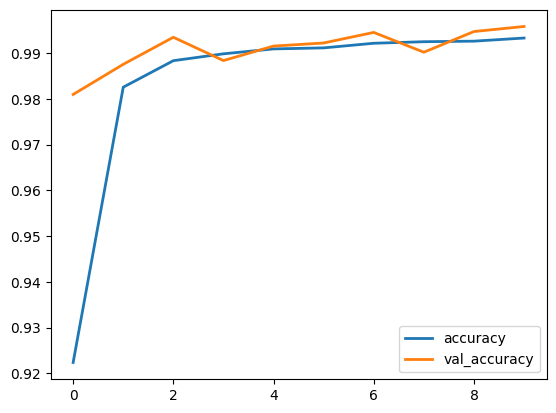

time: 339 ms (started: 2023-05-08 09:23:58 +00:00)


In [33]:
plt.plot(range(10), _[['accuracy','val_accuracy']], linewidth=2, markersize=1)
plt.legend(['accuracy','val_accuracy'])

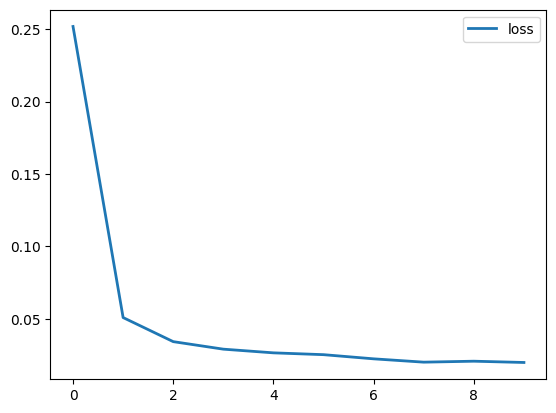

time: 260 ms (started: 2023-05-08 09:23:58 +00:00)


In [34]:
plt.plot(range(10), _['loss'], linewidth=2, markersize=1)
plt.legend(['loss'])

In [35]:
y__= model.predict(X_testPCA)

1219/1219 [==============================] - 2s 2ms/step
time: 2.67 s (started: 2023-05-08 09:23:58 +00:00)


In [36]:
y__.shape

(39000, 13)

time: 4.01 ms (started: 2023-05-08 09:24:01 +00:00)


In [38]:
y1= np.zeros((39000,1))
for i in range(len(y__)):
  y1[i]= np.where(y__[i]==max(y__[i]))

<ipython-input-38-2844113db797>:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y1[i]= np.where(y__[i]==max(y__[i]))


time: 364 ms (started: 2023-05-08 10:16:29 +00:00)


In [39]:
y2=enc.inverse_transform(y1)

time: 4.44 ms (started: 2023-05-08 10:16:32 +00:00)


In [40]:
y_pred=pd.DataFrame(y2)
y_pred.columns = ['Object_Held']

time: 2.98 ms (started: 2023-05-08 10:16:33 +00:00)


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9952051282051282

time: 61.6 ms (started: 2023-05-08 10:16:36 +00:00)


In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm= pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3000,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2999,0,1,0,0,0,0,0,0,0,0,0
2,0,0,3000,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2999,0,0,1,0,0,0,0,0,0
4,0,0,0,0,3000,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3000,0,0,0,0,0,0,0
6,0,0,0,0,0,0,3000,0,0,0,0,0,0
7,0,0,0,0,0,0,0,3000,0,0,0,0,0
8,0,0,0,0,0,0,0,0,3000,0,0,0,0
9,0,1,0,1,0,0,0,0,21,2977,0,0,0


time: 723 ms (started: 2023-05-08 10:17:01 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

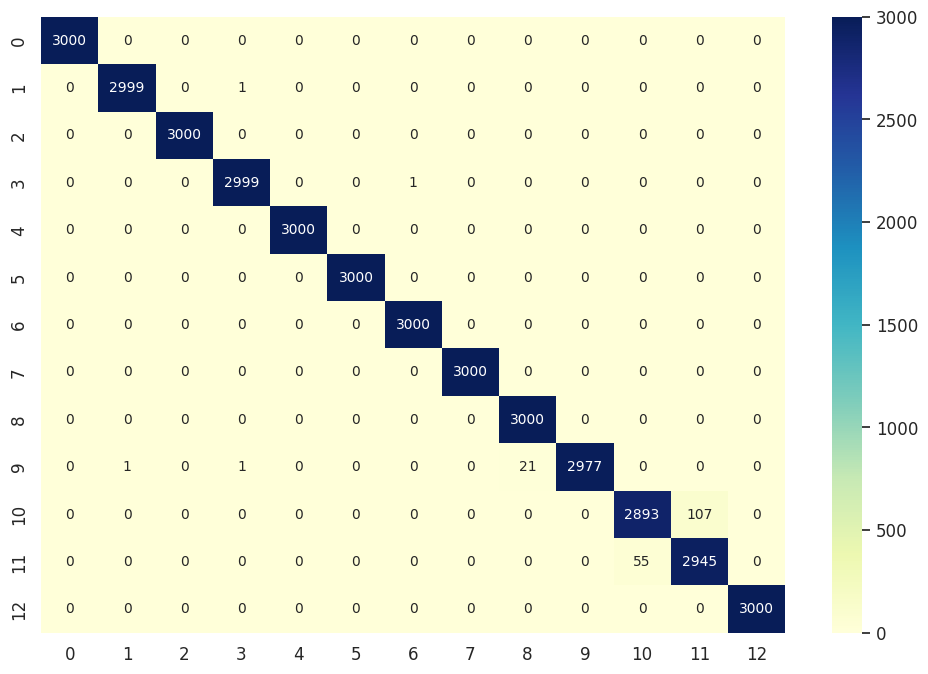

time: 9.57 s (started: 2023-05-08 10:17:17 +00:00)


In [43]:
import seaborn as sb
from google.colab import files
sb.set(font_scale=1.1)
plt.figure(figsize=(12, 8))
dataplot = sb.heatmap(cm, cmap="YlGnBu", annot=True, annot_kws={"size": 10},fmt='d')

plt.savefig("NN_SynMean.png",dpi=800)
files.download("NN_SynMean.png")

plt.show()

In [44]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='macro'),"\n")

print(precision_recall_fscore_support(y_test, y_pred, average='micro'),"\n")

print(precision_recall_fscore_support(y_test, y_pred, average='weighted'), "\n")

(0.9952307665489075, 0.9952051282051282, 0.9952046290568632, None) 

(0.9952051282051282, 0.9952051282051282, 0.9952051282051282, None) 

(0.9952307665489076, 0.9952051282051282, 0.9952046290568631, None) 

time: 3.64 s (started: 2023-05-08 10:22:25 +00:00)
